# Margem de Separação

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from utils import make_normal_data

Text(0, 0.5, 'f')

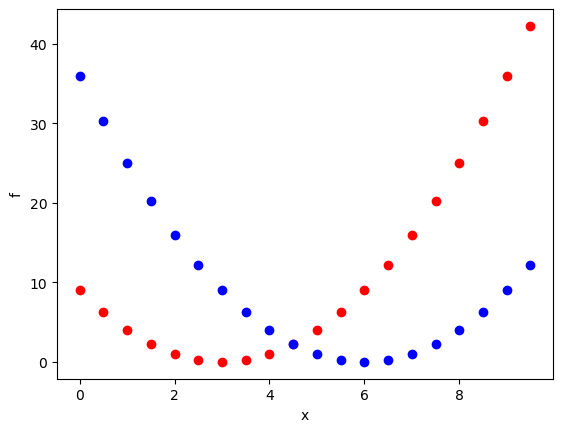

In [3]:
def f(x, m):
    return (x - m)**2

xrange = np.arange(0, 10, 0.5)
f1 = f(xrange, 3)
f2 = f(xrange, 6)
plt.plot(xrange, f1, 'ro', label = 'f1')
plt.plot(xrange, f2, 'bo', label = 'f1')
plt.xlabel('x')
plt.ylabel('f')

['black' 'black' 'black' 'black' 'black' 'black' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'black' 'black' 'black' 'black' 'black'
 'black' 'black']


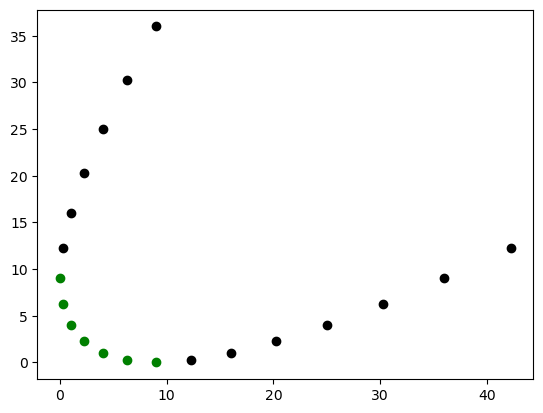

In [ ]:
colvec = np.where((xrange >= 3) & (xrange <= 6), 'green', 'black')
print(colvec)
for i in range(len(f1)):
    plt.plot(f1[i], f2[i], 'o', color=colvec[i])

# Gerando dados Sintéticos

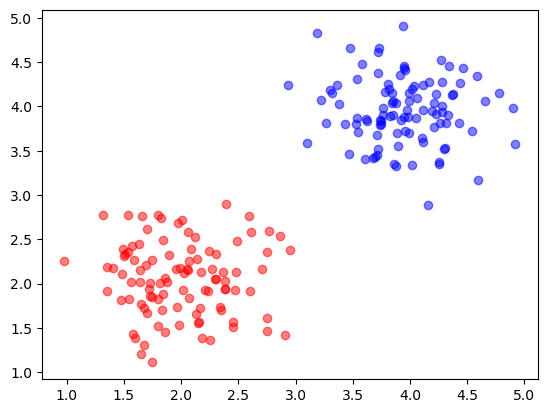

In [5]:
np.random.seed(0)
s1 = 0.4
s2 = 0.4
c1 = np.array([2,2])
c2 = np.array([4,4])
n1 = 100
n2 = 100
x1, y1 = make_normal_data(s = s1, n = n1, c = c1, dim = 2, label = 1)
x2, y2 = make_normal_data(s = s2, n = n2, c = c2, dim = 2, label = -1)
xall = np.vstack((x1, x2))
plt.plot(x1[:,0], x1[:,1], 'ro', label = 'class 1',  alpha = 0.5)
plt.plot(x2[:,0], x2[:,1], 'bo', label = 'class 2',  alpha = 0.5)

# Separação da Superfície

(0.0, 6.0)

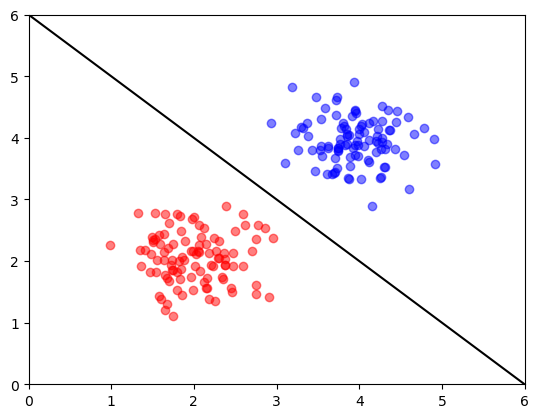

In [6]:
w = np.array([6, 1, 1])
xt = [4, 4]
xtaug = np.array([-1, xt[0], xt[1]])

seqi = np.arange(0, 10, 0.1)
seqj = np.arange(0, 10, 0.1)
M1 = np.zeros((len(seqi), len(seqj)))
for i_idx, i in enumerate(seqi):
    for j_idx, j in enumerate(seqj):
        x = np.array([-1, i, j])
        M1[i_idx][j_idx] = w.T @ x

plt.plot(x1[:,0], x1[:,1], 'ro', label = 'class 1',  alpha = 0.5)
plt.plot(x2[:,0], x2[:,1], 'bo', label = 'class 2',  alpha = 0.5)
plt.contour(seqi, seqj, M1, levels = 0, colors = 'black')
plt.xlim(0, 6)
plt.ylim(0, 6)

/tmp/ipykernel_6090/3206748235.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


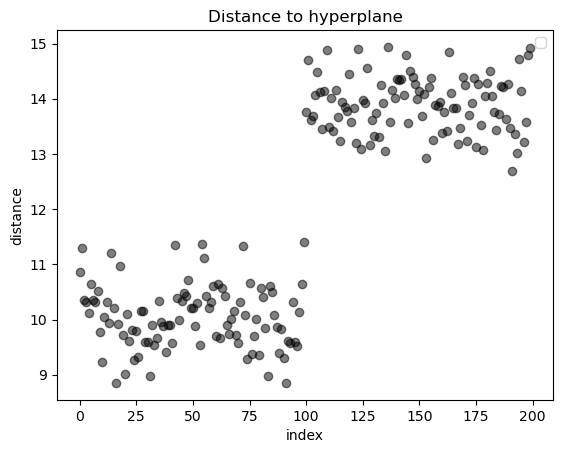

In [ ]:
Xaug = np.hstack((np.ones((xall.shape[0], 1)), xall))
distall = Xaug @ w
plt.plot(distall, 'o', color = 'black', alpha = 0.5)
plt.ylabel('Distância')
plt.xlabel('Índice')
plt.title('Distância para o hiperplano')
plt.legend()

# Cálculo da Margem Máxima

In [8]:
d1 = np.hstack((np.ones((x1.shape[0], 1)), x1)) @ w
i1max = np.argmin(d1)

d2 = np.hstack((np.ones((x2.shape[0], 1)), x2)) @ w
i2max = np.argmax(d2)

print(0.5 * (d1[i1max] + d2[i2max]))

11.895484683016916
